#### Julián Ferreiro (Net ID:jif245)
#### Code was adapated from classes from Prof. Stanislav Sobolevsky 

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

%matplotlib inline
%pylab inline


Populating the interactive namespace from numpy and matplotlib


## Question 1.  (33 pts)

Let's explore clustering models on an artificial data set with five features.

In [2]:
#importing data
data1 = pd.read_csv('hw4data1.csv')
data1.head()

,1,2,3,4,5
0,0.624358,-0.007694,0.157510,0.440554,0.157423
1,-0.065098,-0.000790,0.271934,0.224854,0.158883
2,-0.086525,-0.280988,-0.025699,0.263920,0.421017
3,-0.581743,-0.275640,-0.290320,-0.213967,0.497857
4,0.170606,1.020045,-0.583633,0.887644,0.105641


#### a) First, visualize the data after applying PCA in two dimensions. Based on the plot (with axes corresponding to the two leading PCs), guess the number of clusters we could have. (5 pts)

#### b) Use K-means to cluster the original data based on your guess for the number of clusters. Report the resulting labels. (3 pts)

#### c) Visualize the clustering result: reuse the plot from part a) and color the points according to the labels obtained in part b). (5 pts)

#### d) Justify your guess for k (the optimal number of clusters for K-means clustering) by first using silhouette_score and then the Elbow method on the original data. Briefly explain your approach. Are your results consistent? (12 pts)

#### e) Using a Gaussian Mixture model instead of K-means (but with the same value for k), repeat parts b) and c). (8 pts)

#### a) First, visualize the data after applying PCA in two dimensions. Based on the plot (with axes corresponding to the two leading PCs), guess the number of clusters we could have. (5 pts)

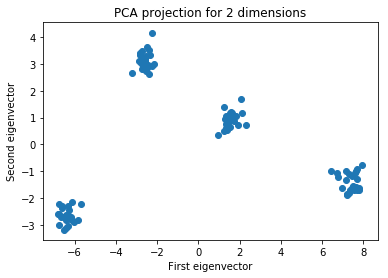

In [3]:
#setting parameter
n=2
pca = PCA(n)
proj = pca.fit_transform(data1)
# Plot the training points
plt.scatter(proj[:, 0], proj[:, 1])
plt.xlabel('First eigenvector')
plt.ylabel('Second eigenvector')
plt.title("PCA projection for {} dimensions".format(n))
plt.show()

Looks like there are 4 clusters of data. This hypothesis below will be test below.

#### b) Use K-means to cluster the original data based on your guess for the number of clusters. Report the resulting labels. (3 pts)


In [4]:
n=4 # number of clusters
dd=data1 #data
#tar=y # real target

#train the model.
km=KMeans(random_state=123,n_clusters=n)
res=km.fit(dd)
#result.
print "The labels are:"
print res.predict(dd)

The labels are:
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


#### c) Visualize the clustering result: reuse the plot from part a) and color the points according to the labels obtained in part b). (5 pts)

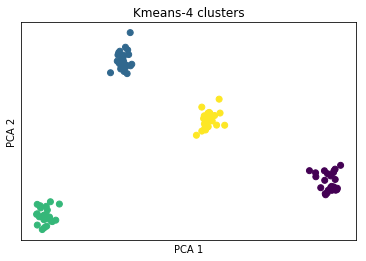

In [5]:
#Plot
plt.scatter(proj[:, 0], proj[:, 1], c=res.labels_, cmap="viridis")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))
plt.show()

#### d) Justify your guess for k (the optimal number of clusters for K-means clustering) by first using silhouette_score and then the Elbow method on the original data. Briefly explain your approach. Are your results consistent? (12 pts)

In [6]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X=data1

range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.577195417571
For n_clusters =3, the average silhouette_score is :0.729751656133
For n_clusters =4, the average silhouette_score is :0.843535323032
For n_clusters =5, the average silhouette_score is :0.689060456153


Note that the highests silhouette score is for 4 clusters.

In [7]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    

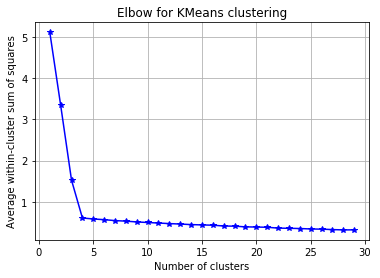

In [8]:
elbow(X, range(1,30))

#### Explanation
What the **silhoutte meassure** is doing is averaging the relative attachment of each point to it's centroid. 
Values close to 1 means the points are closer to the centroid of the cluster than to other centroids. When we calculate the silhoutte scores, we see that the maximum value is obtained for 4 clusters. 

What the **elbow method** measures is the percentage of variance explained by the number of clusters. Each new clusters reduces the variance (when the clusters reach the number of points, the variance would be zero). At one point, adding a new cluster doesn't give a good enough marginal gain and an angle should be visible. That's the point of the elbow and signals an optimal amount of clusters

#### e) Using a Gaussian Mixture model instead of K-means (but with the same value for k), repeat parts b) and c). (8 pts)

In [9]:
import sklearn
#checking version
sklearn.__version__

'0.19.0'

In [10]:
#Repeating part b)
from sklearn.mixture import GaussianMixture 
n=4
gm=GaussianMixture(n_components=n,random_state=123)
res1=gm.fit(data1)
print res1.predict(data1)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


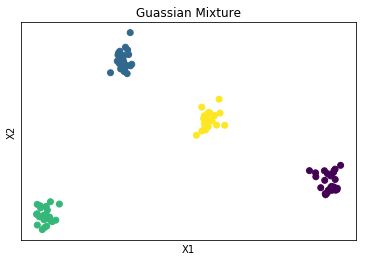

In [11]:
#repeating part c)

plt.scatter(proj[:, 0],proj[:, 1],  c=res1.predict(data1), cmap="viridis")
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Guassian Mixture")
plt.show()

## Question 2. (14 pts)

The following data comes from a larger set detailing every motor vehicle collision in NYC (available [here](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95)). This particular subset only considers collisions that occurred on October 31, 2017.

You have 680 collision records in the file ‘NYPD_Motor_Vehicle_Collisions_Duplicates.csv’, but you realize that some of these are actually duplicates resulting from a technical error. You know that there are approximately 620 unique records in the file, but you want to determine the exact number.

In [12]:
#importing data
data2 = pd.read_csv('NYPD_Motor_Vehicle_Collisions_Duplicates.csv').fillna('')
data2.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/31/2017,0:00,,,40.7331,-73.9548,"(40.733135, -73.954765)",MANHATTAN AVENUE,,,...,Unspecified,,,,3781862,PICK-UP TRUCK,PICK-UP TRUCK,,,
1,10/31/2017,0:00,,,40.7535,-73.8979,"(40.75351, -73.8979)",,,,...,Unspecified,,,,3781130,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,,,
2,10/31/2017,0:00,MANHATTAN,10036,40.7597,-73.9917,"(40.759727, -73.99169)",WEST 44 STREET,9 AVENUE,,...,,,,,3781009,PASSENGER VEHICLE,,,,
3,10/31/2017,0:00,BROOKLYN,11207,,,,LINDEN BOULEVARD,WILLIAMS AVENUE,,...,Unspecified,,,,3780501,PASSENGER VEHICLE,DS,,,
4,10/31/2017,0:00,MANHATTAN,10030,40.8156,-73.9435,"(40.81561, -73.943474)",,,2309 7 AVENUE,...,Unspecified,Unspecified,,,3780511,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,,


#### a) Implement a clustering technique of your choice that will determine the exact number of unique records. (Hint: assigning each unique record to its own cluster would result in perfect clustering. Cluster the data\* based on possible values for the number of unique records and observe the results.) Briefly explain your approach. (10 pts)
\* You may first have to factorize the data set, as it contains string variables.

#### b) Confirm the number of unique records by using a more straightforward technique to identify duplicate rows. Pandas has a convenient function to drop duplicates for this purpose.  How well did your clustering technique perform?  (4 pts)

#### a) Implement a clustering technique of your choice that will determine the exact number of unique records. (Hint: assigning each unique record to its own cluster would result in perfect clustering. Cluster the data\* based on possible values for the number of unique records and observe the results.) Briefly explain your approach. (10 pts)

In [13]:
#Changing string to floats
df2=data2[["LATITUDE","LONGITUDE"]] #selecting only the columns lat long
df2["LAT"]=pd.to_numeric(df2["LATITUDE"]) #changing columns to numeric
df2["LONG"]=pd.to_numeric(df2["LONGITUDE"]) #changing columns to numeric
df2=df2.dropna() #missing dropping values 
df2=df2[["LAT","LONG"]] #selecting only new float columns columns
df2.head()


C:\Users\usuario\Anaconda3\envs\Python2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\usuario\Anaconda3\envs\Python2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,LAT,LONG
0,40.733135,-73.954765
1,40.753510,-73.897900
2,40.759727,-73.991690
4,40.815610,-73.943474
5,40.770733,-73.737404


#### Answer
We now have 614 data points. We can a K-Means cluster for 614 centroids. The points that are equal to the another will fall in the same centroid. The total number of labels of the K-Means fitting will give us the number of unique locations.

In [14]:
n=614 # number of clusters
dd=df2 #data
#tar=y # real target

#train the model.
km=KMeans(random_state=123,n_clusters=n)
res=km.fit(dd)

In [15]:
print "The number of unique clusters is",len(set(res.labels_)) 

The number of unique clusters is 544


#### b) Confirm the number of unique records by using a more straightforward technique to identify duplicate rows. Pandas has a convenient function to drop duplicates for this purpose. How well did your clustering technique perform? (4 pts)¶

In [16]:
print "Shape before duplicate drop",df2.shape
print "Shape after duplicate drop",df2.drop_duplicates().shape

Shape before duplicate drop (614, 2)
Shape after duplicate drop (544, 2)


#### Answer
We see that after dropping duplicates we have the same number as unique clusters. 

## Question 3. (8 pts)

Which of the following is always true for the confusion matrix resulting from a binary classification task? (Select all that apply.)
* a) it is a square matrix
* b) it is symmetrical
* c) it has dimensions $3\times3$
* d) it reports the size of each class in the test set
* e) it reports the total size of the training set
* f) it reports the number of observations the classifier assigned to each class
* g) it reports the proportion of correct predictions across the test set

### Answer
* a) True.
* b) False.
* c) False.
* d) False.
* e) True. But you have to add the values from each of the quadrants to get the total size. 
* f) True.
* g) False.

## Question 4. (25 pts)

For the following logistic regression task, use the first half of the data in 'hw4data4.csv' as the training set, and the second half as the test set.

In [17]:
#importing data
data4 = pd.read_csv('hw4data4.csv')

In [18]:
#import all the libraries


#### a) Construct a logistic regression object for modeling, setting C = 10,000 to disable regularization. (2 pts)

#### b) Fit your logistic regression model to the training data. Print out the fitted parameters (including the intercept). (5 pts)

#### c) Use your trained model to predict labels for the test data. (3 pts)

#### d) Draw two plots: one displaying your predicted labels and another with the actual labels. Include the decision boundary in both. (10 pts)

#### e) Compute the confusion matrix. Print out accuracy, recall and precision. (5 pts)

In [19]:
#visualizing table
data4.head()

,x1,x2,x3,y
0,-1.057594,-0.143935,-1.245903,1
1,-0.642280,1.382141,0.071458,0
2,0.842085,2.400458,-0.110854,0
3,-0.003466,0.725551,-0.007954,0
4,-0.607444,1.146293,-1.338008,0


In [20]:
#splitting data
np.random.seed(13041985)
X_train, X_test, y_train, y_test = train_test_split(data4.iloc[:,:3],data4.y,test_size=0.5)

In [21]:
#Checking size of training and testing sets
print data4.shape
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(200, 4)
(100, 3)
(100, 3)
(100L,)
(100L,)


#### a) Construct a logistic regression object for modeling, setting C = 10,000 to disable regularization. (2 pts)

In [22]:
#learn logistic regression over the training sample
logit = LogisticRegression(C=1e5) #regularization constant
# C is an inverse regularization constant. More detail when we consider Bayesian inference, 
# for now lets just mention that higher C mean no regularization


#### b) Fit your logistic regression model to the training data. Print out the fitted parameters (including the intercept). (5 pts)

In [23]:
#training model and extracting parameteres
logit.fit(X_train, y_train) 
w0 = logit.intercept_
w1,w2,w3 = logit.coef_[0]
print('The parameteres are:\nw0 (intercept) = %.2f\nw1 = %.2f\nw2 = %.2f\nw3 = %.2f '%(w0,w1,w2,w3))

The parameteres are:
w0 (intercept) = -7.58
w1 = -34.16
w2 = -90.35
w3 = -36.38 


#### c) Use your trained model to predict labels for the test data. (3 pts)

In [24]:
#apply to the validation sample
labelPred = logit.predict(X_test) #acá está creando las predicciones
labelActual = y_test

In [25]:
print "The labels are:"
print labelPred

The labels are:
[0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1
 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0]


In [26]:
pylab.rcParams['image.cmap'] = 'viridis'

#### d) Draw two plots: one displaying your predicted labels and another with the actual labels. Include the decision boundary in both. (10 pts)

In [27]:
from mpl_toolkits.mplot3d import Axes3D  # for 3D plot

%matplotlib inline

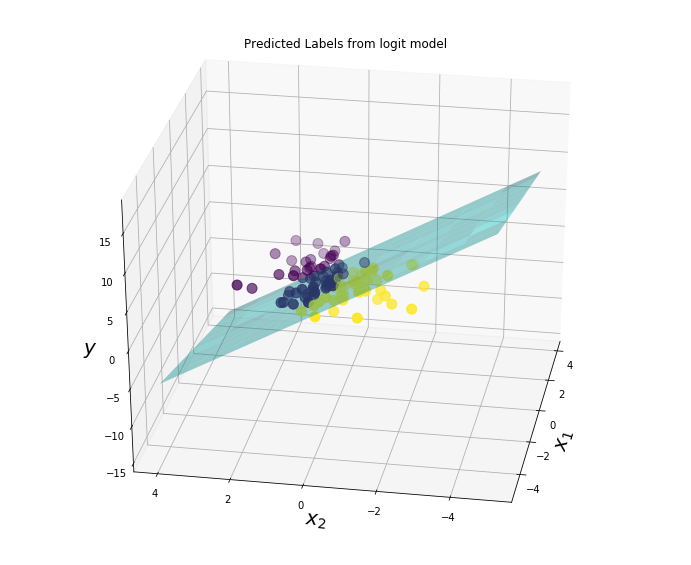

In [28]:
fig = plt.figure(figsize = (12,10))  # Create a plot with customized figure size (width, height)
ax = fig.gca(projection='3d')  # Extract the axis for further operations
ax.scatter(X_test.x1, X_test.x2, X_test.x3, s = 100,  c = labelPred)
# Scatter plot, "c" stands for color, and "s" determines the marker size

# Generate coordinates for hyperplane
radius = 5
x1, x2 = np.meshgrid(range(-radius,radius), range(-radius,radius))
fit_y=-(w0+w1*x1+w2*x2)/w3

# alpha (between 0 and 1) controls the transparency with 0 being totally transparent
ax.plot_surface(x1, x2, fit_y , color='c', alpha = 0.4)
# Set labels and fontsize
ax.set_xlabel('$x_1$', fontsize = 20)
ax.set_ylabel('$x_2$', fontsize = 20)
ax.set_zlabel('$y$', fontsize = 20)
ax.set_title("Predicted Labels from logit model")

ax.view_init(azim = 190)   # Controls the viewing angle


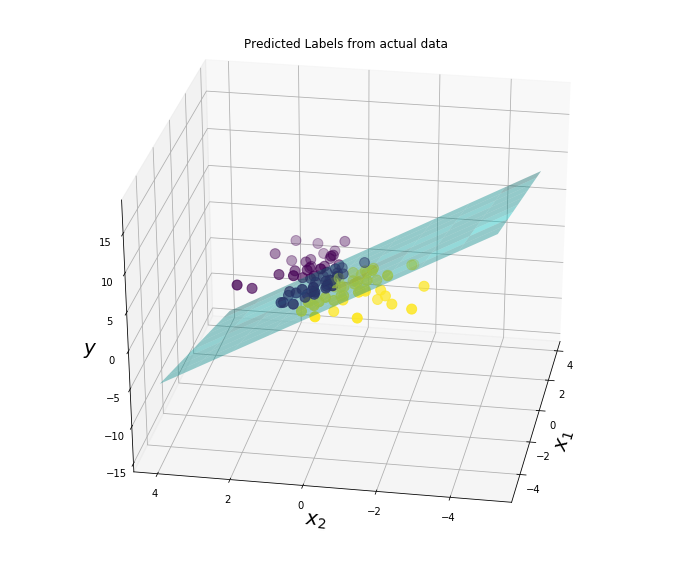

In [29]:
fig = plt.figure(figsize = (12,10))  # Create a plot with customized figure size (width, height)
ax = fig.gca(projection='3d')  # Extract the axis for further operations
ax.scatter(X_test.x1, X_test.x2, X_test.x3, s = 100,  c = labelActual)
# Scatter plot, "c" stands for color, and "s" determines the marker size

# Generate coordinates for hyperplane
radius = 5
x1, x2 = np.meshgrid(range(-radius,radius), range(-radius,radius))
fit_y=-(w0+w1*x1+w2*x2)/w3

# alpha (between 0 and 1) controls the transparency with 0 being totally transparent
ax.plot_surface(x1, x2, fit_y , color='c', alpha = 0.4)
# Set labels and fontsize
ax.set_xlabel('$x_1$', fontsize = 20)
ax.set_ylabel('$x_2$', fontsize = 20)
ax.set_zlabel('$y$', fontsize = 20)
ax.set_title("Predicted Labels from actual data")

ax.view_init(azim = 190)   # Controls the viewing angle



#### e) Compute the confusion matrix. Print out accuracy, recall and precision. (5 pts)

In [30]:
print "The confusion matrix for the logit model is:"
print(confusion_matrix(labelPred, labelActual))

The confusion matrix for the logit model is:
[[57  2]
 [ 0 41]]


In [31]:
#calculating precision, accuracy and 
TP = sum((labelPred==1)&(labelActual==1))
FP = sum((labelPred==1)&(labelActual==0))
FN = sum((labelPred==0)&(labelActual==1))
TN = sum((labelPred==0)&(labelActual==0))

#compute precision, accuracy and recall
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))

Precision = 100.00%
Accuracy = 98.00%
Recall = 95.35%



## Question 5. (20 pts)

Let's revisit the Iris data set, which consists of three different classes of irises (labeled 0, 1, and 2).
<br>We'll use all four features (sepal length, sepal width, petal length and petal width) to train a logistic regression multi-class classifier.

#### a) Load Iris data from sklearn.datasets and set up X and y accordingly (retain all the features for X). (2 pts)

#### b) Fit a logistic regression model to the entire data set (no need to split into training and test sets). (5 pts)

#### c) Use the model to predict class labels for the same data on which it was trained. (2 pts)

#### d) Calculate and print out the multi-class (3$\times$3) confusion matrix. (5 pts)

#### e) Based on the confusion matrix you've obtained, calculate: (2 pts)
    i) the precision with respect to the class labeled 0
    ii) the model's overall accuracy
    
#### f) Create a scatter plot of the data after applying PCA in two dimensions. Use the labels obtained in part c) to visualize the classification.  (4 pts)

#### a) Load Iris data from sklearn.datasets and set up X and y accordingly (retain all the features for X). (2 pts)

In [32]:
from sklearn import datasets

In [33]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first two features.
Y = iris.target

#### b) Fit a logistic regression model to the entire data set (no need to split into training and test sets). (5 pts)

In [34]:
logreg = LogisticRegression(C=1e6)
logreg.fit(X, Y)

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

#### c) Use the model to predict class labels for the same data on which it was trained. (2 pts)

In [35]:
Z = logreg.predict(X)
print "The labels generated by the model are:"
print Z

The labels generated by the model are:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### d) Calculate and print out the multi-class (3$\times$3) confusion matrix. (5 pts)


In [36]:
print "The multiclass confussion matrix is:"
print(confusion_matrix(Z,Y))

The multiclass confussion matrix is:
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


Note that class 0 is completely classified.

#### e) Based on the confusion matrix you've obtained, calculate: (2 pts)
    i) the precision with respect to the class labeled 0
    ii) the model's overall accuracy

i.a) One way to calculate the precision for category 0:

In [37]:
TP = sum((Z==0)&(Y==0))
FP = sum((Z==0)&(np.logical_xor(Y==1, Y==2)))
Prec= 100.0 * TP/(TP+FP)

print "precision for category 0:"
print Prec

precision for category 0:
100.0


i.b) Another way to calculate the precision for category 0:

In [38]:
from sklearn.metrics import precision_score
print "precision for category 0:"
Prec=precision_score(Y, Z,labels="0",average="micro")*100
print Prec

precision for category 0:
100.0


C:\Users\usuario\Anaconda3\envs\Python2\lib\site-packages\numpy\lib\arraysetops.py:459: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


ii.a) One way to calculate the accuracy:

In [39]:
from sklearn.metrics import accuracy_score
Acc=accuracy_score(Y, Z)*100
print('Precision for the model = %.1f%%'%(Acc))

Precision for the model = 96.0%


ii.b) Annother way to calculate the accuracy:

In [40]:
print "Looking at the confusion matrix:"
print(confusion_matrix(Z,Y))
print
Accuracy=(50+47+47)*100.0/(50+47+47+3+3)
print "We can obtain the Accuracy by doing the correctly classified over the total:"
print "(50+47+47)*100.0/(50+47+47+3+3)"
print
print('Precision for the model = %.1f%%'%(Accuracy))

Looking at the confusion matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]

We can obtain the Accuracy by doing the correctly classified over the total:
(50+47+47)*100.0/(50+47+47+3+3)

Precision for the model = 96.0%


    
#### f) Create a scatter plot of the data after applying PCA in two dimensions. Use the labels obtained in part c) to visualize the classification.  (4 pts)

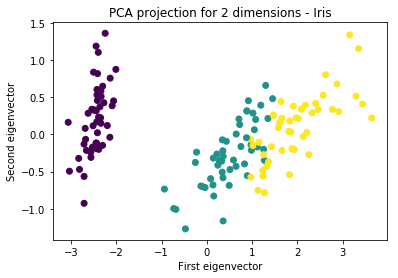

In [41]:
#doing PCA
n=2
pca = PCA(n)
proj = pca.fit_transform(X)
# Plot the training points
plt.scatter(proj[:, 0], proj[:, 1],c=Z, cmap="viridis")
plt.xlabel('First eigenvector')
plt.ylabel('Second eigenvector')
plt.title("PCA projection for {} dimensions - Iris".format(n))
plt.show()